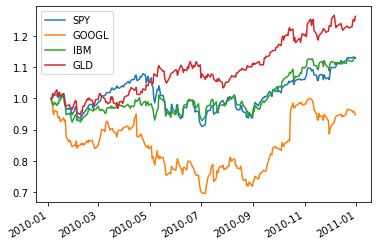

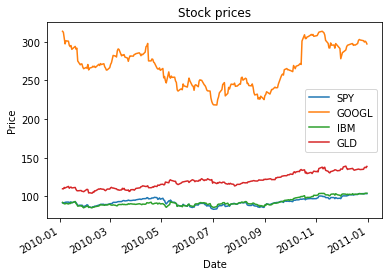

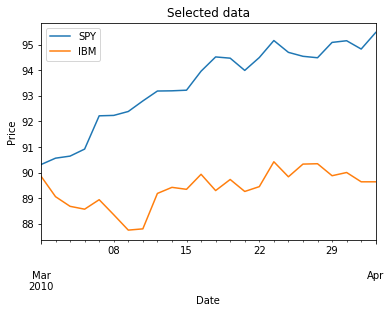

In [82]:
"""Utility functions"""

import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    df1=df.loc[start_index:end_index,columns]
    plot_data(df1,'Selected data')

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True, usecols=['Date','Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df=df.join(df_temp)  # use default how='left'
        if symbol == 'SPY':  # drop dates SPY did not trade
            df=df.dropna(subset=['SPY'])
    return df

def normalise_data(df):
    #Normalising by stock value on first row
    df1 = df.div(df.iloc[0])
    df1.plot()

def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOGL', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
#    print(df)
    
    #Slice by row range (dates) using DataFrame.ix[] selector
#    print(df['2010-01-01':'2010-01-31'])
    
    #Slice by column (symbols)
#    print(df['GOOGL'])
#    print(df[['IBM','GLD']])
    
    # Slice by row and column
#    print(df.loc['2010-03-10':'2010-03-15',['SPY','IBM']])
    
#    df.plot()
    
    normalise_data(df)
    
    plot_data(df,'Stock prices')
    
    plot_selected(df, ['SPY','IBM'], '2010-03-01', '2010-04-01')

def plot_data(df,title):
    # Plot stock prices'''
    ax=df.plot(title=title,fontsize=10)
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Price',fontsize=10)
#    df.plot()
#    plt.show()
    
if __name__ == "__main__":
    test_run()


